# Customer Segmentation using K-Means Clustering

## 1. Import Required Libraries

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"   # or "2", "3", etc.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 2. Load Dataset

In [3]:

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Inspect the Dataset

In [4]:

print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Records:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Shape: (200, 5)

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Records: 0

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000         

## 4. Data Preprocessing - Standardize the features

In [5]:

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Determine Optimal Number of Clusters using Elbow Method

In [6]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

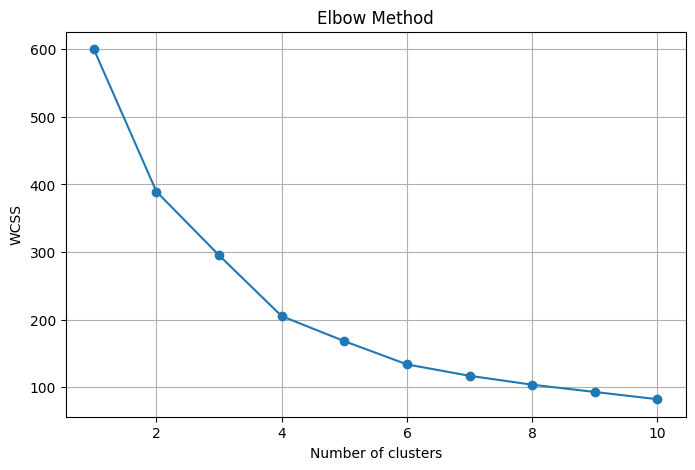

In [7]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## 6. Silhouette Score Evaluation 

In [8]:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3578
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4166
Silhouette Score for k=6: 0.4284
Silhouette Score for k=7: 0.4172
Silhouette Score for k=8: 0.4082
Silhouette Score for k=9: 0.4177
Silhouette Score for k=10: 0.4066


## 7. Apply KMeans Clustering

In [9]:

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## 8. Dimensionality Reduction using PCA for 2D Visualization

In [10]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

## 9. 2D Scatter Plot of Clusters

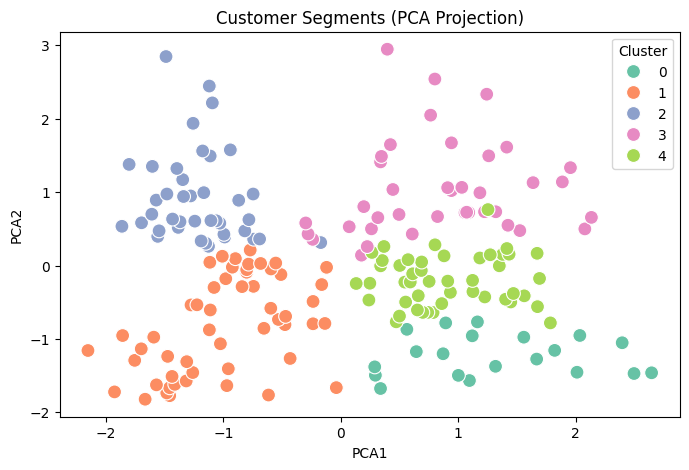

In [11]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA Projection)')
plt.show()

### 2D Scatter Plot with Cluster Centroids

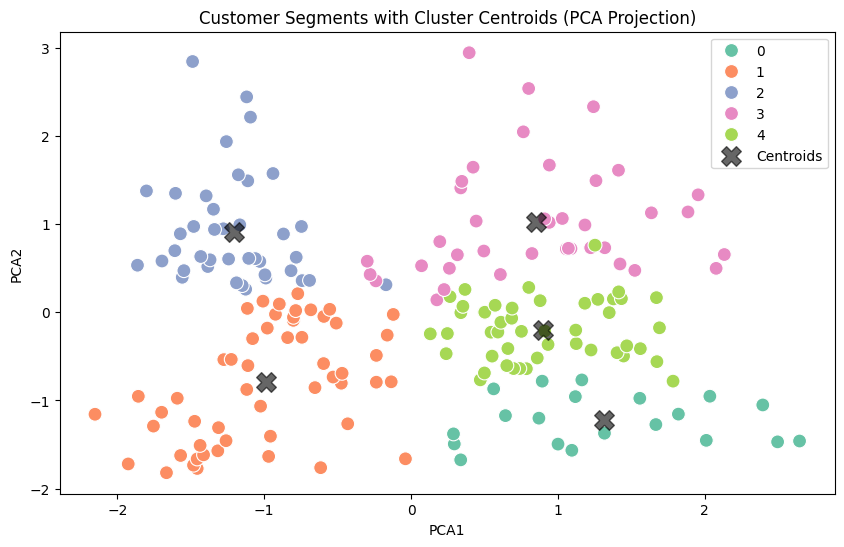

In [12]:

# Calculate centroids in PCA space
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.title('Customer Segments with Cluster Centroids (PCA Projection)')
plt.legend()
plt.show()


## 10. Pair Plot

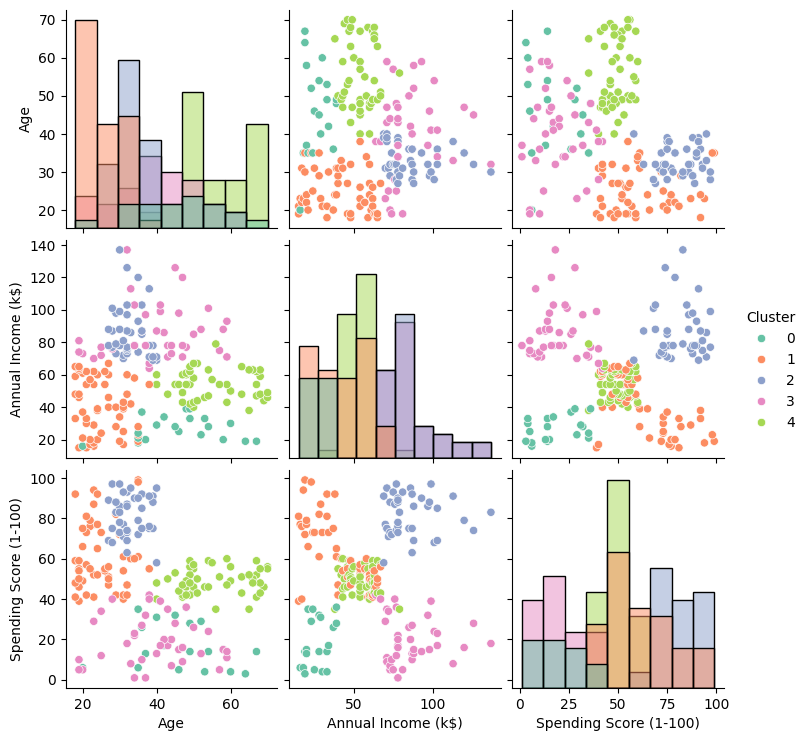

In [13]:

sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2', diag_kind='hist')
plt.show()

## 11. Save and view the clustered dataset

In [14]:

df.to_csv("clustered_customers.csv", index=False)
print("Clustered dataset saved as clustered_customers.csv")
df

Clustered dataset saved as clustered_customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,PCA1,PCA2
0,1,Male,19,15,39,1,-0.615720,-1.763481
1,2,Male,21,15,81,1,-1.665793,-1.820747
2,3,Female,20,16,6,0,0.337862,-1.674799
3,4,Female,23,16,77,1,-1.456573,-1.772430
4,5,Female,31,17,40,1,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,-1.093705,2.215577
196,197,Female,45,126,28,3,0.800448,2.540748
197,198,Male,32,126,74,2,-1.119709,2.445169
198,199,Male,32,137,18,3,0.395411,2.946665
